In [1]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [2]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructione below.
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

In [4]:
# Uncomment to install tensorflow_datasets
!pip install tensorflow_datasets --quiet
!pip install pydot --quiet

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from packaging import version
import sklearn
import tensorflow as tf
tensorflow_version = tf.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

In [6]:
# Fill in your names using the format below
your_name = "Patni, Nikhil"

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed up training a lot. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 4th cell on the top of this notebook to check that the GPU is found.

Note that the free version of Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine. Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right before the deadline.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you. Be sure to upload all .h5 and .p files, as well as any .json files created (these are created only for large models).

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
  * The 2nd cell (above) does this programmatically for you
* Fill in the path to your assignment folder below
  * It's likely `base_dir = '/content/drive/My Drive/assignment-3-name'`
  * 'name' will likely be your github handle

In [7]:
# Define where the models should be stored
#base_dir = '/content/drive/My Drive/assignment-3-nikhil-96'
base_dir = './'

### Verification and submission

If you use Colab, there are a few things to consider before submission:
* You need to download the notebook and all the models from your Google Drive to a local folder. Models should be stored in the main directory, next to your notebook.
* To run the notebook locally (e.g. for the verification script), make sure that you have set `stop_training = True` in the first cell to avoid retraining all models. Also comment out any Colab-specific code in the cells above.
* Set `base_dir` back to your local directory where the files are, likely `base_dir = './'`
* Again, don't wait until the last moment to verify and submit.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are. We provide code below that stores the model efficiently. Smaller models are simply stored entirely to disk as one h5 file. For larger models, we will only store the weights (h5 file) and structure (json file), and ignore the state of the optimizer. In any case, the weights alone should not take more than 100MB of storage. Take this into account especially for loading pre-trained models in the last question. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage.
* When questions ask you to provide an explanation, it should be less than 600
characters long. Be concise, but answer in full sentences. Focus on the essence, don't ramble.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters", yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your models perform. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance, with the top grade awarded to the best model in class. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time, especially if you have limited RAM on your local device (laptop). Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now). That way the dataset will be cached so that you can do the verification faster.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

### Data

For this assigment we will use a [Tensorflow Dataset](https://www.tensorflow.org/datasets). We selected [rock_paper_scissors dataset](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors) which includes images of hands playing rock, paper and scissor game. Each image is of shape (300, 300, 3) and the dataset contains 2520 training and 372 testing images. You can explore the images from this dataset at [this link](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=rock_paper_scissors).

In [8]:
import tensorflow_datasets as tfds

ds_train, ds_test = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    shuffle_files=False,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\patni\tensorflow_datasets\rock_paper_scissors\3.0.0.incomplete24VYW8\rock_paper_scissors-tr…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\patni\tensorflow_datasets\rock_paper_scissors\3.0.0.incomplete24VYW8\rock_paper_scissors-te…

Dataset rock_paper_scissors downloaded and prepared to C:\Users\patni\tensorflow_datasets\rock_paper_scissors\3.0.0. Subsequent calls will reuse this data.


#### Image preprocessing

We need to resize the images to fit the RAM memory provided by Google Colab. We reshape each dataset entry from (300, 300, 3) to (160, 160, 3). The `IMG_SIZE = 160` is chosen to be compatible with the trained weights of the model used for transfer learning at the end of the assigment. The value of each pixel is converted from [0, 255] range to [0, 1] range.

In [9]:
IMG_SIZE  = 160
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

def process_img(sample):
  sample['image'] = tf.cast(sample['image'], tf.float32)
  sample['image'] = sample['image'] / 255.
  sample['image'] = tf.image.resize(sample['image'], [IMG_SIZE, IMG_SIZE])
  return sample

ds_train = ds_train.map(process_img)
ds_test  = ds_test.map(process_img)

We randomly split the training dataset into 90% (X_train, y_train) and 10% (X_valid, y_valid). The final split contains 2268 training, 252 validation and 372 testing images.

In [10]:
# Don't change the name of these variables

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

ds_train_np = np.vstack(list(tfds.as_numpy(ds_train)))
ds_test_np  = np.vstack(list(tfds.as_numpy(ds_test)))

X_train_all = np.array(list(map(lambda x: x[0]['image'], ds_train_np)))
y_train_all = np.array(list(map(lambda x: x[0]['label'], ds_train_np)))
y_train_all = to_categorical(y_train_all)

X_test = np.array(list(map(lambda x: x[0]['image'], ds_test_np)))
y_test = np.array(list(map(lambda x: x[0]['label'], ds_test_np)))
y_test = to_categorical(y_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_all,y_train_all, stratify=y_train_all, 
                                                      train_size=0.9, test_size=0.1, random_state=1)

evaluation_split = X_train, X_valid, y_train, y_valid
class_names = ["rock", "paper", "scissors"]

Check the formatting - and what the data looks like

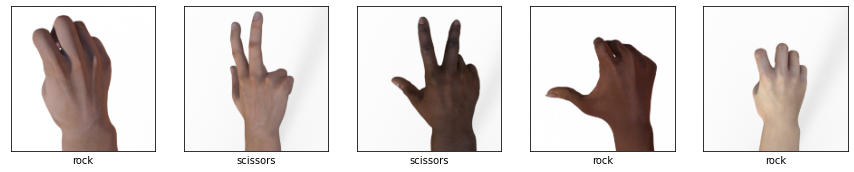

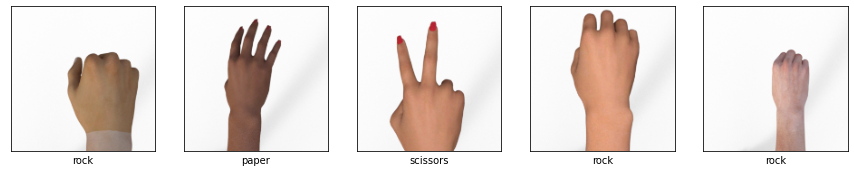

In [11]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(15,30))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel(class_names[np.argmax(y[n])])
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)-1) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)


images = [randint(0,len(X_test)-1) for i in range(5)]
X_random = [X_test[i] for i in images]
y_random = [y_test[i] for i in images]
plot_images(X_random, y_random)

In [12]:
X_train.shape, y_train.shape

((2268, 160, 160, 3), (2268, 3))

In [13]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [14]:
X_valid.shape, y_valid.shape

((252, 160, 160, 3), (252, 3))

In [15]:
X_test.shape, y_test.shape

((372, 160, 160, 3), (372, 3))

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [16]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

# Helper function for user feedback
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Helper function to format answers
def print_answer(ans):
    output = ""
    for line in ans.splitlines()[0:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
    

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed.
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Evaluation harness
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not. Set batch size to None when using a generator.
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with. Set batch size to None when using a generator.
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    print_model -- whether or not to print the model
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}

    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(base_dir,name+'.png'))

In [17]:
# Toy usage example
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((IMG_SIZE*IMG_SIZE*3,), input_shape=(IMG_SIZE,IMG_SIZE,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?
Model not found


In [18]:
# Toy usage example
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?
Model not found


## Part 1. Convolutional neural networks (30 points)
### Question 1.1: Design a ConvNet (15 points)
- Build a sequential convolutional neural network to distinguish rock, paper and scissors hand images.
- Try to achieve the best validation accuracy you can. You should be able to get at least 65% validation accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. You can use different batch sizes and number of epochs.
- Add a description of your design choices in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- Explictly explore different filter sizes and padding techniques. Explain what the effect is, also in relationship with the layer input sizes.
- You are allowed **600** characters for this answer (but don’t ramble).
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data as shown below.

**NOTE:** The training is expected to be noisy and unstable.The training dataset is quite small, with a lot of variety in terms of the position of the hand, skin color, left and right hand. For this exercise, we will not use any data augmentation, so avoiding overfitting is quite hard. However, you are expected to tackle the overfitting by layer regularization, dropout layers, learning rate tuning a.s.o.

Max val score: 100.00%


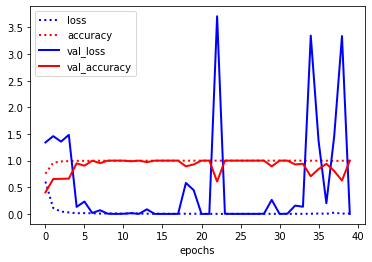

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 batch_normalization_43 (Bat  (None, 160, 160, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 batch_normalization_44 (Bat  (None, 80, 80, 32)       128       
 chNormalization)                                                
                                                      

In [19]:
from keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=40, batch_size=32)

answer_q_1_1 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Data Augmentation (15 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, color augmentation etc. What works well, and what does not? Reason about what might work or not on these images.
- Implement the generator in a function `augment_data` that returns a generator and the validation set
- Either use the `build_model_1_1` or design another model in `build_model_1_2`. Evaluate the model  with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_1_2'. You should be able to get at least 85% validation accuracy.
- Add an explanation of your design choices for augmentation techniques in answer_q_1_2.  Also discuss the performance of the model.
- You are allowed **600** characters for this answer (but don’t ramble).

In [20]:
# X_tensor = tf.image.rgb_to_grayscale(X_train)
# X_tensor.numpy().shape, y_train.shape

Max val score: 100.00%


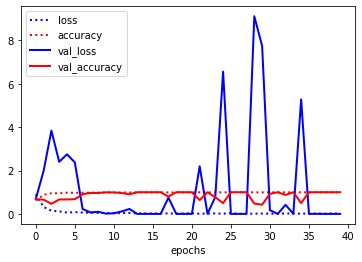

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 batch_normalization_50 (Bat  (None, 160, 160, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 batch_normalization_51 (Bat  (None, 80, 80, 32)       128       
 chNormalization)                                                
                                                     

In [21]:
# Note that we build the same untrained model as in question 1.1 but store the 
# trained version as model_1_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

def augment_data():
    """ Augments the data and returns a generator and the validation data and labels
    """
    generator = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        # shear_range=0.3,
        # zoom_range=0.08,
        horizontal_flip=True,
        # vertical_flip=True,
        ).flow(X_train, y_train, batch_size=32)
    return generator, X_valid, y_valid

def build_model_1_2():
    return build_model_1_1() # Replace with a new model if you prefer

# Batch size should be None since we are using a generator.
# You can add a steps_per_epoch parameter if you like
steps = int(X_train.shape[0] / 32)
run_evaluation("model_1_2", build_model_1_2, augment_data(), base_dir, 
               train=True, generator=True, epochs=40, batch_size=None, steps_per_epoch=steps)

answer_q_1_2 = "We're doing data augmentation to generate more data, to train model on different variation of images which contribute information to the network. I did image_rotation upto 40 degrees to get more close to real-life images. I shifted images left-right and up-down upto 20% of image width and height respectively to get more information if images are out of frame or to train model to look for hand in different part of axis. I also generated horizontal flipped images. Overall, model is performing quite well with almost '1' accuracy on validation set."

print("Answer is {} characters long".format(len(answer_q_1_2)))

## Part 2. Model evaluation (25 points)
### Question 2.1: Accuracy on the testing set (5 points)

Load the last trained model (`model_1_2`) and use it to predict the classes for the testing set, X_test. Compute the accuracy based on y_test and store it in `test_accuracy_2_1`. You should be able to obtain a testing accuracy of at least 85%.

In [22]:
from tensorflow.keras.models import load_model

def evaluate_model():
    # json_file = open(os.path.join(base_dir, 'model_1_2.json'), 'r')
    # loaded_model_json = json_file.read()
    # json_file.close()
    # loaded_model = model_from_json(loaded_model_json)
    # loaded_model.load_weights(os.path.join(base_dir, 'model_1_2.h5'))
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    # loaded_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
    #               loss='categorical_crossentropy',
    #               metrics=['accuracy'])
    test_loss, test_acc = model.evaluate(X_test, y_test)
    return test_acc
test_accuracy_2_1 = evaluate_model()
print(test_accuracy_2_1)

12/12 [==============================] - 2s 125ms/step - loss: 0.0665 - accuracy: 0.9812
0.9811828136444092


### Question 2.2: Confusion matrix (20 points)

* Plot the confusion matrix in `plot_confusion_matrix` and discuss which classes are often confused.
* Analyze the misclassifications in more depth by visualizing which kinds of mistakes are made for each class (rock, paper and scissors). For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in `plot_misclassifications`. Ideally, plot 5 examples of misclassifications for each class. You can obtain a very good model for some classes, which means it will not make 5 mistakes from the testing set. In this case, we need to plot all the misclassifications for that class.
* For `plot_misclassifications`, each missclasified images should have two labels, actual class and predicted class.
* Interpret the results and summarize your findings in `answer_q_2`. Focus on explaining why certain images are misclassified. Are they somehow harder or has your model not learned to recognize some occurences in the images? Keep in mind that there are images which are quite similar in the dataset.
- You are allowed **600** characters for this answer (but don’t ramble).

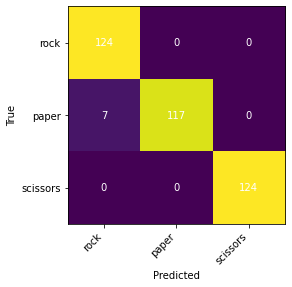

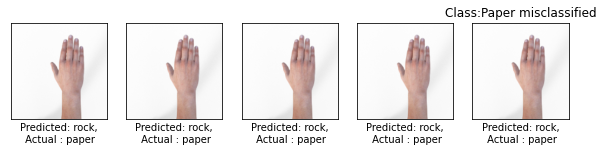

Answer is 598 characters long


In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix():
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(3)), ax.set_yticks(np.arange(3))
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_yticklabels(class_names)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(9):
        ax.text(int(i/3),i%3,cm[i%3,int(i/3)], ha="center", va="center", color="w")

def plot_misclassifications():
    model = load_model(os.path.join(base_dir, 'model_1_2.h5'))
    y_pred = model.predict(X_test)

    misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
    misclassified_samples_paper = []
    misclassified_samples_scissors = []
    for x in misclassified_samples:
      if(np.argmax(y_test[x]) == 1):
        misclassified_samples_paper.append(x)
      
      if(np.argmax(y_test[x]) == 2):
        misclassified_samples_scissors.append(x)

    fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    for nr, i in enumerate(misclassified_samples_paper[:5]):
        axes[nr].imshow(X_test[i])
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (class_names[np.argmax(y_pred[i])],class_names[np.argmax(y_test[i])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())

    plt.title("Class:Paper misclassified")
    plt.show()

    # fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
    # for nr, i in enumerate(misclassified_samples_scissors[:5]):
    #     axes[nr].imshow(X_test[i])
    #     axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (class_names[np.argmax(y_pred[i])],class_names[np.argmax(y_test[i])]))
    #     axes[nr].set_xticks(()), axes[nr].set_yticks(())

    # plt.title("Class:Scissors misclassified")
    # plt.show()

plot_confusion_matrix()
plot_misclassifications()

answer_q_2 = "Shown in confusion matrix, Rock class is perfectly predicted by the model as it learned the shape of a fist. Sometimes model confused paper as rock and scissors as paper. The reason model is confused paper as rock is because there is one particular type of paper image (repeated) in which there's no gap between fingers unlike other paper images and model learned this no gap between fingers pattern for rock class. Similar reason for scissors and paper as there's one scissor image (repeated) in which there is thumb with space from 2 fingers unlike other scissor images which have only 2 fingers."
print("Answer is {} characters long".format(len(answer_q_2)))

## Part 3. Transfer learning (45 points)
### Question 3.1 Transfer learning from MobileNet (25 points)

- Import the MobileNetV2 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_3_1` that adds at least one dense hidden layer and output layer to the convolutional base, and freezes the convolutional base. Add [Global Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) after the convolutional base, right before the dense layer(s). Consider unfreezing the last few convolutional layers, in a systematic way, and evaluate whether that works better. You can also consider adding multiple dense hidden layers and regularization layers.
- Train the resulting model on the augmented training data for the 3-class problem.
- Evaluate model_3_1 using `run_evaluation`. Store the accuracy on the testing set in `test_accuracy_3_1`. You should be able to obtain a testing accuracy of at least 85%.

9420800/9406464 [==============================] - 3s 0us/step
154
Max val score: 100.00%


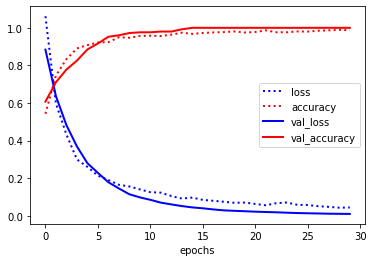

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_14 (Bat  (None, 512)             

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

import tensorflow.keras.backend as K
#K.clear_session()

# Load ImageNet pre-trained MobileNetV2
INPUT_IMG_SHAPE = (160, 160, 3)
conv_base = MobileNetV2(
  input_shape=INPUT_IMG_SHAPE,
  include_top=False,
  weights="imagenet",
)

print(len(conv_base.layers))

def build_model_3_1():
    conv_base.trainable = True
    # freeze first layers
    for layer in conv_base.layers[:150]:
        layer.trainable =  False
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

steps = int(X_train.shape[0] / 32)
run_evaluation("model_3_1", build_model_3_1, augment_data(), base_dir, 
               train=True, generator=True, epochs=30, batch_size=None, steps_per_epoch=steps)

model = load_model(os.path.join(base_dir, 'model_3_1.h5'))
test_loss, test_acc = model.evaluate(X_test, y_test)

test_accuracy_3_1 = test_acc
print(test_accuracy_3_1)

### Question 3.2: Visualizing the learned embeddings with tSNE (20 points)

Extract the learned embeddings of the images from X_train using your `model_3_1` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.


- Implement a function `create_embeddings` to extract the n-sized embeddings based on the  Convolutional part of `model_3_1` (e.g MobileNetV2 generates 1280-sized embeddings). The embeddings are the output of the GlobalAveragePooling layer.
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for MobileNetV2 this will mean `original_array` of  size (num_images, 1280) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true labels
- Intrepret the 2D TSNE map in terms of the formed clusters. Talk about the performance of the transfer learning model. Store your answer in `answer_q_3`. 
- You are allowed **600** characters for this answer (but don’t ramble).

In [25]:
model = load_model(os.path.join(base_dir, 'model_3_1.h5'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_14 (Bat  (None, 512)             

In [26]:
#model2 = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('global_average_pooling2d').output)
model2 = tf.keras.models.Model(inputs=model.input, outputs=model.layers[1].output)
features = model2.predict(X_train)

In [27]:
features.shape

(2268, 1280)

In [28]:
from sklearn.manifold import TSNE

def create_embeddings(model_file):
    model = load_model(os.path.join(base_dir, f'{model_file}.h5'))
    model2 = tf.keras.models.Model(inputs=model.input, outputs=model.layers[1].output)
    features = model2.predict(X_train)
    return features

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    return TSNE(verbose=0).fit_transform(original_array)

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_3_1")
d2_embs = compute_tsne(dn_embs)

C:\Users\patni\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\patni\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
d2_embs.shape

(2268, 2)

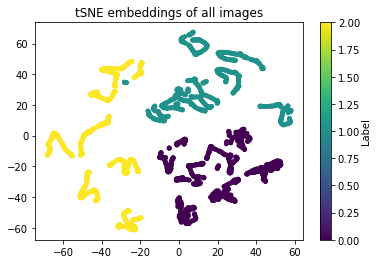

['rock', 'paper', 'scissors']
Answer is 44 characters long


In [30]:
import seaborn as sns

def plot_tsne(tsne_embeds, labels):
    marker_size=15
    label = []
    for i in np.argmax(labels, axis=1):
      label.append(class_names[i])

    plt.scatter(tsne_embeds[:,0], tsne_embeds[:,1], marker_size, c=np.argmax(labels, axis=1))
    plt.title("tSNE embeddings of all images")
    cbar= plt.colorbar()
    cbar.set_label("Label", labelpad=+1)
    plt.show()
    print(class_names)

plot_tsne(d2_embs, y_train)

answer_q_3 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_3)))

In [31]:
# np.argmax(y_train, axis=1)
# label = []
# for i in np.argmax(y_train, axis=1):
#   label.append(class_names[i])

# label

In [32]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)